In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_actual = pd.read_csv('HistoricalSalesandActive Inventory_3years_testing_.csv', header=None)
data_actual.columns = ['Timestamp','Store','Item','Sales']
data_actual.head()

##pick item 1 and store 1
data_actual_1 = data_actual[ (data_actual['Store'] == 1) & (data_actual['Item'] == 1) & (data_actual['Sales'])] 
data_actual_1 = data_actual_1.iloc[0:48]
print(data_actual_1.shape)

(48, 4)


## Data Characteristics

   index   Timestamp  Store  Item  Sales
0      0  2015-01-01      1     1     11
1      1  2015-01-02      1     1     19
2      5  2015-01-06      1     1      9
3      6  2015-01-07      1     1     13
4      9  2015-01-10      1     1     17
   index   Timestamp  Store  Item  Sales
0    913  2015-01-02      1     2     45
1    914  2015-01-03      1     2     41
2    915  2015-01-04      1     2     49
3    916  2015-01-05      1     2     25
4    917  2015-01-06      1     2     27


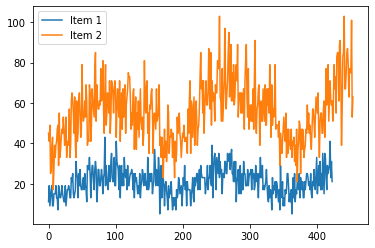

In [11]:
data_training = pd.read_csv('HistoricalSalesandActive Inventory_3years_training_.csv', header=None)
data_training.columns = ['Timestamp','Store','Item','Sales']
data_training_1 = data_training[ (data_training['Store'] == 1) & (data_training['Item'] == 1) & (data_training['Sales'])] 
data_training_2 = data_training[ (data_training['Store'] == 1) & (data_training['Item'] == 2) & (data_training['Sales'])] 
data_training_1 = data_training_1.reset_index()
data_training_2 = data_training_2.reset_index()

print(data_training_1.head(5))
print(data_training_2.head(5))

plt.plot(data_training_1['Sales'], label='Item 1')
plt.plot(data_training_2['Sales'], label='Item 2')
plt.legend()
plt.show()

In [6]:
# Historical Sales and Active Inventory
data_p10 = pd.read_csv('deepAr/p10_result.csv')
data_p50 = pd.read_csv('deepAr/p50_result.csv')
data_p90 = pd.read_csv('deepAr/p90_result.csv')
# print(data_p50.info())
# print(data_p50.head())

## change timestamp start from 07/01/2017 to 121 date later
data_p10_plot = pd.DataFrame({
    'Timestamp': pd.date_range(start='7/01/2017', periods=180),
    'Values': data_p10['Value']
})

data_p50_plot = pd.DataFrame({
    'Timestamp': pd.date_range(start='7/01/2017', periods=180),
    'Values': data_p50['Value']
})

data_p90_plot = pd.DataFrame({
    'Timestamp': pd.date_range(start='7/01/2017', periods=180),
    'Values': data_p90['Value']
})

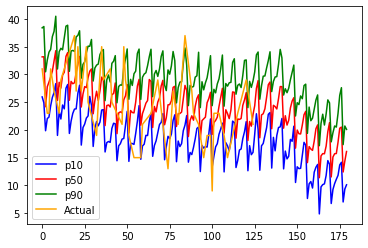

In [7]:
# plot forecasts against actual outcomes
plt.plot(data_p10_plot['Values'], label='p10', color='blue')
plt.plot(data_p50_plot['Values'], label='p50', color='red')
plt.plot(data_p90_plot['Values'], label='p90', color='green')
plt.plot(data_actual_1['Sales'], label='Actual', color='orange')
plt.legend()
plt.show()